In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
df = pd.read_csv("weight-height (1).csv")

In [61]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [62]:
df = df.rename(columns={'Gender':'gender', 'Height':'height', 'Weight':'weight'})

In [63]:
df.isna().sum()

gender    0
height    0
weight    0
dtype: int64

In [64]:
df['gender'].value_counts()

gender
Male      5000
Female    3555
Name: count, dtype: int64

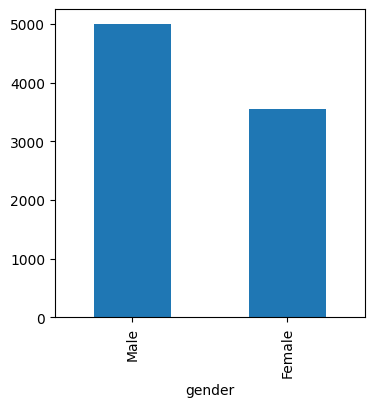

In [65]:
#visualization
plt.figure(figsize=(4,4))
df['gender'].value_counts().plot(kind="bar")
plt.show()

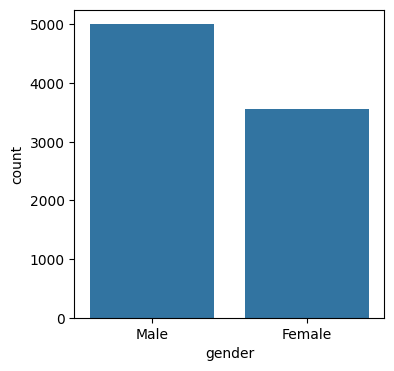

In [66]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='gender')
plt.show()

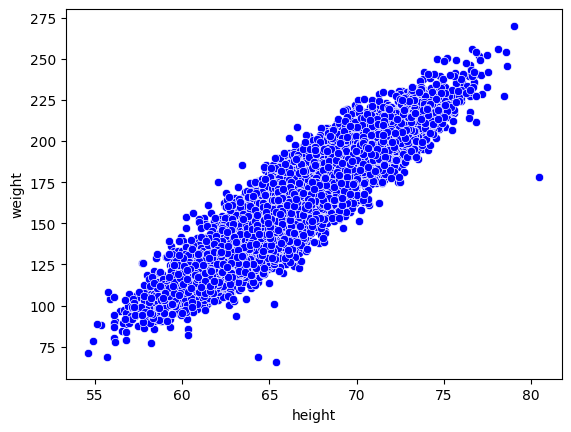

In [67]:
sns.scatterplot(x='height', y='weight', data=df, color='blue')
plt.show()

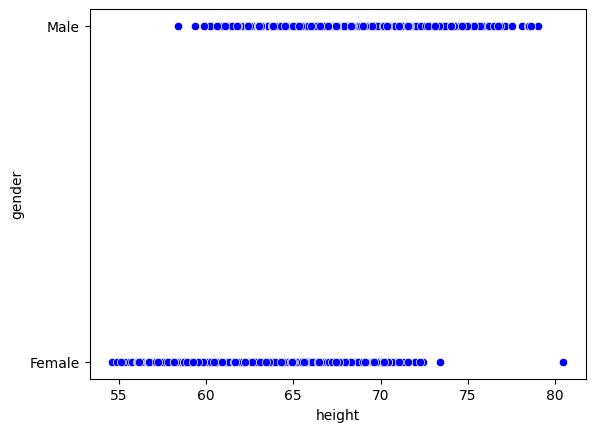

In [68]:
sns.scatterplot(x='height', y='gender', data=df, color='blue')
plt.show()

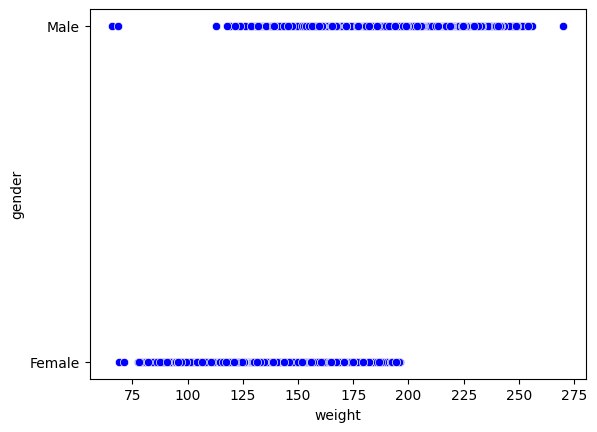

In [69]:
sns.scatterplot(x='weight', y='gender', data=df, color='blue')
plt.show()

In [70]:
x = df[['height']]
y = df[['gender']]

In [71]:
y = y.replace(['Male','Female'],[1,0])

C:\Users\MD Maruf\AppData\Local\Temp\ipykernel_19724\3895514928.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(['Male','Female'],[1,0])


In [72]:
y.head()

,gender
0,1
1,1
2,1
3,1
4,1


In [73]:
print(f"X_shape {x.shape} and Y_shape {y.shape}")

X_shape (8555, 1) and Y_shape (8555, 1)


In [74]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
xtrain.head()

,height
6826,60.817590
624,71.711125
5518,63.674482
3946,70.466623
6993,61.528212


In [76]:
ytrain.head()

,gender
6826,0
624,1
5518,0
3946,1
6993,0


In [77]:
xtest.head()

,height
6006,64.846644
1197,68.886367
2862,70.963369
6497,62.737189
2860,69.578030


In [78]:
ytest.head()

,gender
6006,0
1197,1
2862,1
6497,0
2860,1


In [79]:
#linear model implementation
lr = LinearRegression()

In [80]:
model = lr.fit(xtrain, ytrain)

In [81]:
model.score(xtrain, ytrain)

0.4594188156863007

In [82]:
model.score(xtest, ytest)

0.49140882000720854

In [83]:
#prediction generate
pred_y = model.predict(xtest)
pred_y

array([[0.41598143],
       [0.76695921],
       [0.94741259],
       ...,
       [0.88929493],
       [0.87691656],
       [0.41376695]], shape=(1711, 1))

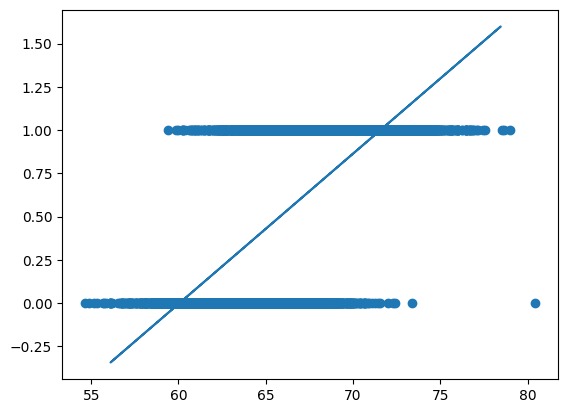

In [84]:
plt.scatter(xtrain, ytrain)
plt.plot(xtest, pred_y)
plt.show()

In [85]:
predi_y = model.predict(xtest).ravel()

In [86]:
#mae 
mae = mean_absolute_error(ytest, predi_y)
mae

0.29120793388808164

In [87]:
#mse 
mse = mean_squared_error(ytest, predi_y)
mse

0.12326493983827454

In [88]:
#r2
r2 = r2_score(ytest, predi_y)
r2

0.49140882000720854

In [89]:
#logistic model implemntation
los = LogisticRegression()
los

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [90]:
model2 = los.fit(xtrain, ytrain)

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
model2.score(xtrain, ytrain)

0.8299240210403273

In [92]:
model2.score(xtest, ytest)

0.8457042665108124

In [93]:
los_pred_y = model2.predict(xtest)

In [94]:
los_pred_y

array([0, 1, 1, ..., 1, 1, 0], shape=(1711,))

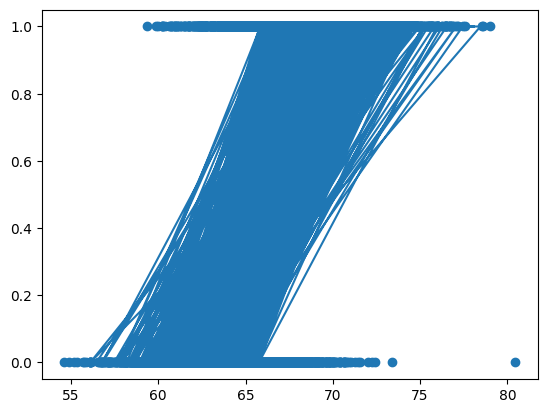

In [95]:
plt.scatter(xtrain, ytrain)
plt.plot(xtest, los_pred_y)
plt.show()

In [96]:
pred_pro = model2.predict_proba(xtest)

In [97]:
pred_pro

array([[0.65090414, 0.34909586],
       [0.11729508, 0.88270492],
       [0.03304391, 0.96695609],
       ...,
       [0.05026155, 0.94973845],
       [0.05489925, 0.94510075],
       [0.65468138, 0.34531862]], shape=(1711, 2))

In [98]:
xtrain.head()

,height
6826,60.817590
624,71.711125
5518,63.674482
3946,70.466623
6993,61.528212


In [99]:
model2.predict_proba(xtest)[:, 0]

array([0.65090414, 0.11729508, 0.03304391, ..., 0.05026155, 0.05489925,
       0.65468138], shape=(1711,))

In [100]:
model2.predict_proba(xtest)[:, 1]

array([0.34909586, 0.88270492, 0.96695609, ..., 0.94973845, 0.94510075,
       0.34531862], shape=(1711,))

In [101]:
val = np.linspace(1,10,100)
val

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

In [102]:
new_x = np.linspace(x.min(), x.max(), 1000).reshape(-1,1)
new_x

array([[54.61685783],
       [54.64271683],
       [54.66857583],
       [54.69443483],
       [54.72029383],
       [54.74615284],
       [54.77201184],
       [54.79787084],
       [54.82372984],
       [54.84958884],
       [54.87544784],
       [54.90130684],
       [54.92716584],
       [54.95302485],
       [54.97888385],
       [55.00474285],
       [55.03060185],
       [55.05646085],
       [55.08231985],
       [55.10817885],
       [55.13403785],
       [55.15989685],
       [55.18575586],
       [55.21161486],
       [55.23747386],
       [55.26333286],
       [55.28919186],
       [55.31505086],
       [55.34090986],
       [55.36676886],
       [55.39262787],
       [55.41848687],
       [55.44434587],
       [55.47020487],
       [55.49606387],
       [55.52192287],
       [55.54778187],
       [55.57364087],
       [55.59949987],
       [55.62535888],
       [55.65121788],
       [55.67707688],
       [55.70293588],
       [55.72879488],
       [55.75465388],
       [55

In [105]:
pred = model2.predict(new_x)
pred

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [106]:
pred_data = model2.predict_proba(new_x)
pred_data

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.99332707e-01, 6.67293390e-04],
       [9.99321336e-01, 6.78663871e-04],
       [9.99309772e-01, 6.90227967e-04],
       ...,
       [7.15389486e-05, 9.99928461e-01],
       [7.03396537e-05, 9.99929660e-01],
       [6.91604626e-05, 9.99930840e-01]], shape=(1000, 2))

In [107]:
pred_data = model2.predict_proba(new_x)[:, 0]
pred_data

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([9.99332707e-01, 9.99321336e-01, 9.99309772e-01, 9.99298011e-01,
       9.99286050e-01, 9.99273885e-01, 9.99261513e-01, 9.99248930e-01,
       9.99236133e-01, 9.99223118e-01, 9.99209882e-01, 9.99196420e-01,
       9.99182730e-01, 9.99168806e-01, 9.99154645e-01, 9.99140243e-01,
       9.99125596e-01, 9.99110699e-01, 9.99095549e-01, 9.99080141e-01,
       9.99064471e-01, 9.99048534e-01, 9.99032326e-01, 9.99015843e-01,
       9.98999078e-01, 9.98982029e-01, 9.98964689e-01, 9.98947054e-01,
       9.98929119e-01, 9.98910879e-01, 9.98892329e-01, 9.98873463e-01,
       9.98854276e-01, 9.98834763e-01, 9.98814918e-01, 9.98794735e-01,
       9.98774209e-01, 9.98753333e-01, 9.98732103e-01, 9.98710512e-01,
       9.98688553e-01, 9.98666221e-01, 9.98643509e-01, 9.98620411e-01,
       9.98596921e-01, 9.98573030e-01, 9.98548734e-01, 9.98524025e-01,
       9.98498895e-01, 9.98473338e-01, 9.98447347e-01, 9.98420914e-01,
       9.98394032e-01, 9.98366693e-01, 9.98338890e-01, 9.98310613e-01,
      

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


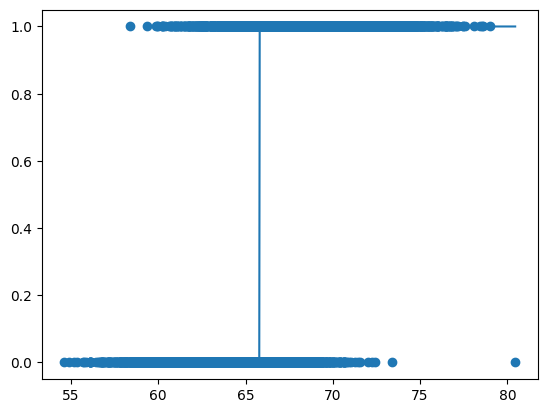

In [104]:
plt.scatter(x,y)
plt.plot(new_x, model2.predict(new_x))
plt.show()

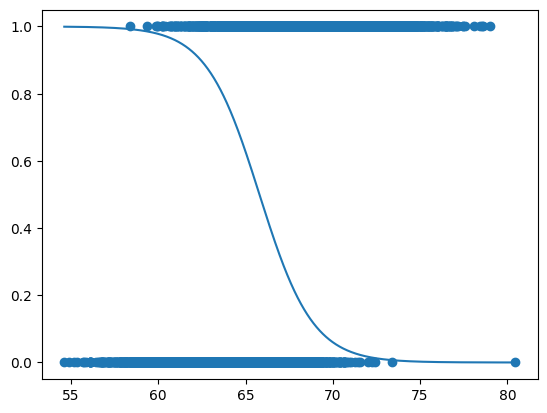

In [108]:
plt.scatter(x,y)
plt.plot(new_x, pred_data)
plt.show()

In [111]:
pred_data2 = model2.predict_proba(new_x)[:, 1]
pred_data2

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([6.67293390e-04, 6.78663871e-04, 6.90227967e-04, 7.01988972e-04,
       7.13950232e-04, 7.26115154e-04, 7.38487199e-04, 7.51069889e-04,
       7.63866805e-04, 7.76881588e-04, 7.90117943e-04, 8.03579634e-04,
       8.17270492e-04, 8.31194412e-04, 8.45355355e-04, 8.59757348e-04,
       8.74404487e-04, 8.89300939e-04, 9.04450938e-04, 9.19858793e-04,
       9.35528884e-04, 9.51465665e-04, 9.67673668e-04, 9.84157498e-04,
       1.00092184e-03, 1.01797146e-03, 1.03531120e-03, 1.05294599e-03,
       1.07088083e-03, 1.08912083e-03, 1.10767115e-03, 1.12653708e-03,
       1.14572396e-03, 1.16523725e-03, 1.18508249e-03, 1.20526530e-03,
       1.22579142e-03, 1.24666666e-03, 1.26789697e-03, 1.28948835e-03,
       1.31144693e-03, 1.33377895e-03, 1.35649073e-03, 1.37958871e-03,
       1.40307945e-03, 1.42696961e-03, 1.45126594e-03, 1.47597535e-03,
       1.50110484e-03, 1.52666151e-03, 1.55265262e-03, 1.57908551e-03,
       1.60596769e-03, 1.63330676e-03, 1.66111046e-03, 1.68938666e-03,
      

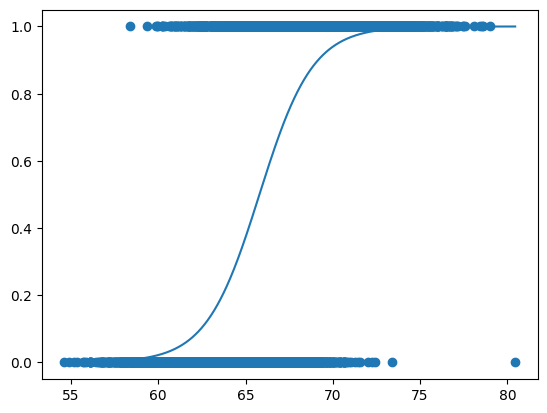

In [113]:
plt.scatter(x,y)
plt.plot(new_x, pred_data2)
plt.show()